# Exploring metrics after training

In this example, we dive deeper into our results and compare each partner performance against the federated model

In [2]:
# imports
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
sns.set()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

# Object and methodes needed in order to run a collaborative round
from subtest.dataset import Dataset
from subtest.scenario import Scenario, run_scenario

## Quick scenario run 

In [3]:
scenario_params = {
    'partners_count': 3,
    'amounts_per_partner': [0.2, 0.5, 0.3],
}

scenario_params['epoch_count'] = 20
scenario_params['minibatch_count'] = 3

current_scenario = Scenario(scenario_params)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0],  28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

input_shape = (28, 28, 1)
num_classes = 10


def preprocess_dataset_labels(y):
    y = np_utils.to_categorical(y, 10)
    return y


def generate_new_model_for_dataset():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Flatten())
    # Densely connected layers
    model.add(Dense(128, activation='relu'))
    # output layer
    model.add(Dense(num_classes, activation='softmax'))
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


current_scenario.dataset = Dataset(
    "my_dataset",
    X_train,
    X_test,
    y_train,
    y_test,
    input_shape,
    num_classes,
    preprocess_dataset_labels,
    generate_new_model_for_dataset
)

current_scenario.dataset.train_val_split()

2020-08-21 09:38:44.024 | DEBUG    | subtest.scenario:__init__:54 - Dataset selected: mnist
2020-08-21 09:38:44.025 | DEBUG    | subtest.scenario:__init__:89 - Computation use the full dataset for scenario #1
2020-08-21 09:38:44.085 | INFO     | subtest.scenario:__init__:281 - ### Description of data scenario configured:
2020-08-21 09:38:44.085 | INFO     | subtest.scenario:__init__:282 -    Number of partners defined: 3
2020-08-21 09:38:44.086 | INFO     | subtest.scenario:__init__:283 -    Data distribution scenario chosen: random
2020-08-21 09:38:44.086 | INFO     | subtest.scenario:__init__:284 -    Multi-partner learning approach: fedavg
2020-08-21 09:38:44.087 | INFO     | subtest.scenario:__init__:285 -    Weighting option: uniform
2020-08-21 09:38:44.087 | INFO     | subtest.scenario:__init__:286 -    Iterations parameters: 20 epochs > 3 mini-batches > 8 gradient updates per pass
2020-08-21 09:38:44.087 | INFO     | subtest.scenario:__init__:292 - ### Data loaded: mnist
2020-08

In [3]:
run_scenario(current_scenario)

2020-08-19 13:45:56.577 | INFO     | subtest.scenario:split_data:536 - ### Splitting data among partners:
2020-08-19 13:45:56.578 | INFO     | subtest.scenario:split_data:537 -    Simple split performed.
2020-08-19 13:45:56.578 | INFO     | subtest.scenario:split_data:538 -    Nb of samples split amongst partners: 38880
2020-08-19 13:45:56.579 | INFO     | subtest.scenario:split_data:540 -    Partner #0: 7776 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-19 13:45:56.579 | INFO     | subtest.scenario:split_data:540 -    Partner #1: 19440 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-19 13:45:56.580 | INFO     | subtest.scenario:split_data:540 -    Partner #2: 11664 samples with labels [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
2020-08-19 13:45:56.829 | DEBUG    | subtest.scenario:compute_batch_sizes:584 -    Compute batch sizes, partner #0: 324
2020-08-19 13:45:56.829 | DEBUG    | subtest.scenario:compute_batch_sizes:584 -    Compute batch sizes, partner #1: 810
2020-08-19

2020-08-19 13:46:20.014 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 01/19 > Minibatch 02/02 > Partner id #1 (1/2) > val_acc: 0.89
2020-08-19 13:46:20.897 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 01/19 > Minibatch 02/02 > Partner id #2 (2/2) > val_acc: 0.89
2020-08-19 13:46:20.900 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:303 - End of fedavg collaborative round.
2020-08-19 13:46:21.201 | INFO     | subtest.multi_partner_learning:compute_test_score:184 -    Model evaluation at the end of the epoch: ['0.401', '0.896']
2020-08-19 13:46:21.201 | DEBUG    | subtest.multi_partner_learning:compute_test_score:187 -       Checking if early stopping criteria are met:
2020-08-19 13:46:21.202 | DEBUG    | subtest.multi_partner_learning:compute_test_score:197 -          -> Early stopping criteria are not met, continuing with training.
2020-08-19 13:46:21.257 |

2020-08-19 13:46:38.279 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:46:38.279 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°0 of epoch n°4, init aggregated model for each partner with models from previous round
2020-08-19 13:46:39.370 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 04/19 > Minibatch 00/02 > Partner id #0 (0/2) > val_acc: 0.95
2020-08-19 13:46:40.171 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 04/19 > Minibatch 00/02 > Partner id #1 (1/2) > val_acc: 0.94
2020-08-19 13:46:40.930 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 04/19 > Minibatch 00/02 > Partner id #2 (2/2) > val_acc: 0.95
2020-08-19 13:46:40.934 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_

2020-08-19 13:46:58.000 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:46:58.001 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°1 of epoch n°6, init aggregated model for each partner with models from previous round
2020-08-19 13:46:59.081 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 06/19 > Minibatch 01/02 > Partner id #0 (0/2) > val_acc: 0.97
2020-08-19 13:46:59.878 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 06/19 > Minibatch 01/02 > Partner id #1 (1/2) > val_acc: 0.97
2020-08-19 13:47:00.635 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 06/19 > Minibatch 01/02 > Partner id #2 (2/2) > val_acc: 0.97
2020-08-19 13:47:00.638 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_

2020-08-19 13:47:17.734 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:47:17.735 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°2 of epoch n°8, init aggregated model for each partner with models from previous round
2020-08-19 13:47:18.822 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 08/19 > Minibatch 02/02 > Partner id #0 (0/2) > val_acc: 0.98
2020-08-19 13:47:19.614 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 08/19 > Minibatch 02/02 > Partner id #1 (1/2) > val_acc: 0.98
2020-08-19 13:47:20.359 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 08/19 > Minibatch 02/02 > Partner id #2 (2/2) > val_acc: 0.98
2020-08-19 13:47:20.362 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_

2020-08-19 13:47:37.835 | INFO     | subtest.multi_partner_learning:compute_test_score:184 -    Model evaluation at the end of the epoch: ['0.060', '0.983']
2020-08-19 13:47:37.836 | DEBUG    | subtest.multi_partner_learning:compute_test_score:187 -       Checking if early stopping criteria are met:
2020-08-19 13:47:37.837 | DEBUG    | subtest.multi_partner_learning:compute_test_score:197 -          -> Early stopping criteria are not met, continuing with training.
2020-08-19 13:47:37.892 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:47:37.892 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°0 of epoch n°11, init aggregated model for each partner with models from previous round
2020-08-19 13:47:38.996 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 11/19 > Minibatch 00/02 > Partner id #0 (0/2

2020-08-19 13:47:57.276 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 13/19 > Minibatch 00/02 > Partner id #1 (1/2) > val_acc: 0.98
2020-08-19 13:47:58.033 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 13/19 > Minibatch 00/02 > Partner id #2 (2/2) > val_acc: 0.98
2020-08-19 13:47:58.036 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:303 - End of fedavg collaborative round.
2020-08-19 13:47:58.037 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:47:58.037 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°1 of epoch n°13, init aggregated model for each partner with models from previous round
2020-08-19 13:47:59.147 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 13/19 >

2020-08-19 13:48:16.993 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 15/19 > Minibatch 01/02 > Partner id #1 (1/2) > val_acc: 0.99
2020-08-19 13:48:17.746 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 15/19 > Minibatch 01/02 > Partner id #2 (2/2) > val_acc: 0.99
2020-08-19 13:48:17.749 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:303 - End of fedavg collaborative round.
2020-08-19 13:48:17.749 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:259 - Start new fedavg collaborative round ...
2020-08-19 13:48:17.750 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:271 - (fedavg) Minibatch n°2 of epoch n°15, init aggregated model for each partner with models from previous round
2020-08-19 13:48:18.833 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 15/19 >

2020-08-19 13:48:36.701 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 17/19 > Minibatch 02/02 > Partner id #1 (1/2) > val_acc: 0.99
2020-08-19 13:48:37.452 | DEBUG    | subtest.multi_partner_learning:log_collaborative_round_partner_result:513 - Epoch 17/19 > Minibatch 02/02 > Partner id #2 (2/2) > val_acc: 0.98
2020-08-19 13:48:37.456 | DEBUG    | subtest.multi_partner_learning:compute_collaborative_round_fedavg:303 - End of fedavg collaborative round.
2020-08-19 13:48:37.760 | INFO     | subtest.multi_partner_learning:compute_test_score:184 -    Model evaluation at the end of the epoch: ['0.045', '0.987']
2020-08-19 13:48:37.761 | DEBUG    | subtest.multi_partner_learning:compute_test_score:187 -       Checking if early stopping criteria are met:
2020-08-19 13:48:37.761 | DEBUG    | subtest.multi_partner_learning:compute_test_score:197 -          -> Early stopping criteria are not met, continuing with training.
2020-08-19 13:48:37.818 |

2020-08-19 13:48:54.736 | INFO     | subtest.multi_partner_learning:compute_test_score:200 - ### Evaluating model on test data:
2020-08-19 13:48:54.966 | INFO     | subtest.multi_partner_learning:compute_test_score:203 -    Model metrics names: ['loss', 'accuracy']
2020-08-19 13:48:54.967 | INFO     | subtest.multi_partner_learning:compute_test_score:204 -    Model metrics values: ['0.041', '0.987']
2020-08-19 13:48:55.199 | INFO     | subtest.multi_partner_learning:compute_test_score:212 - Training and evaluation on multiple partners: done.


0

## Let's play  a bit more with the results

First, let's see how our loss behaves

In [4]:
losses = current_scenario.mpl.loss_collective_models
print(losses)

[0.7112064383824667, 0.40071558554967246, 0.23271952585379282, 0.16545267379283904, 0.1349064653714498, 0.10740008962154389, 0.09630769807100296, 0.07953248739242554, 0.07054527393976848, 0.06468366202712059, 0.06039136552810669, 0.056070049916704494, 0.05242728239297867, 0.04849264366428058, 0.047016125599543254, 0.04279360789060593, 0.04652458814283212, 0.04523593420783679, 0.04036673008898894, 0.04823912021517754]


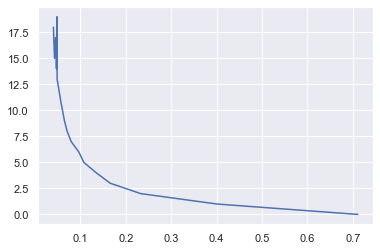

In [5]:
x = range(len(losses))
y = losses

sns.lineplot(x=x, y=y)        

### Let's see how our accuracy score goes between each partner and compare it with aggregated model performance

First, let's see every accuracy value on each minibatch, for each partner on epoch 1-3

In [6]:
x= current_scenario.mpl.score_matrix_per_partner
print(x[:3]) 

[[[0.54874998 0.57249999 0.51183331]
  [0.73516667 0.74266666 0.7504167 ]
  [0.78383332 0.79408336 0.79533333]]

 [[0.72425002 0.7245     0.8326667 ]
  [0.84549999 0.81475002 0.80725002]
  [0.86941665 0.89125001 0.89166665]]

 [[0.88349998 0.89583331 0.87866664]
  [0.91891664 0.92308331 0.9095    ]
  [0.91583335 0.93241668 0.92591667]]]


This is a lot of information to deal with, for now, we will only work with the first minibatch of each epoch

In [7]:
x = x[:,:,0]
print(x[:3])

[[0.54874998 0.73516667 0.78383332]
 [0.72425002 0.84549999 0.86941665]
 [0.88349998 0.91891664 0.91583335]]


Now let's pack this information into a single dataframe

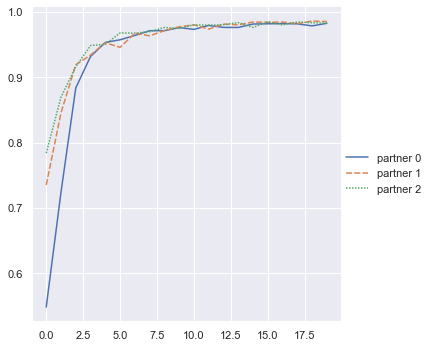

In [8]:
d = {
    'partner 0' : x[:,0],
    'partner 1' : x[:,1],
    'partner 2' : x[:,2]
}

df = pd.DataFrame(d)

sns.relplot(data = df, kind = "line")

### Now let's compare this result to our averaged model

In [9]:
x_collective = current_scenario.mpl.score_matrix_collective_models

print(x_collective)

[[0.06566667 0.55874997 0.75999999 0.81108332]
 [0.81108332 0.79133332 0.83908331 0.89600003]
 [0.89600003 0.89625001 0.92774999 0.9325    ]
 [0.9325     0.94383335 0.94566667 0.95383334]
 [0.95383334 0.95466667 0.96116668 0.96074998]
 [0.96074998 0.96508336 0.96399999 0.96899998]
 [0.96899998 0.96799999 0.97216666 0.97233331]
 [0.97233331 0.97258335 0.97683334 0.97724998]
 [0.97724998 0.97691667 0.97966665 0.97941667]
 [0.97941667 0.98058331 0.97991669 0.98075002]
 [0.98075002 0.98158336 0.98333335 0.98283333]
 [0.98283333 0.98224998 0.98199999 0.98358333]
 [0.98358333 0.98366666 0.98441666 0.98549998]
 [0.98549998 0.98583335 0.98608333 0.98675001]
 [0.98675001 0.98658335 0.98633331 0.98608333]
 [0.98608333 0.98733336 0.98783332 0.98774999]
 [0.98774999 0.98783332 0.98858333 0.98666668]
 [0.98666668 0.98658335 0.98716664 0.98683333]
 [0.98683333 0.98733336 0.98699999 0.98783332]
 [0.98783332 0.98825002 0.98724997 0.986     ]]


We will just focus ourselves on the first mini batch of each epoch again

           0
0   0.065667
1   0.811083
2   0.896000
3   0.932500
4   0.953833
5   0.960750
6   0.969000
7   0.972333
8   0.977250
9   0.979417
10  0.980750
11  0.982833
12  0.983583
13  0.985500
14  0.986750
15  0.986083
16  0.987750
17  0.986667
18  0.986833
19  0.987833


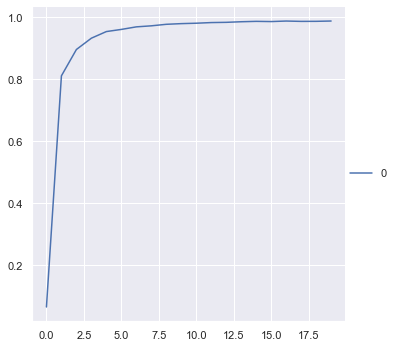

In [10]:
x_collective = x_collective[:,0]

df_collective = pd.DataFrame(x_collective)


print(df_collective)

sns.relplot(data = df_collective, kind = "line")

### Now let's compare this model to each partner's model :

In [11]:
d = {
    'partner 0' : x[:,0],
    'partner 1' : x[:,1],
    'partner 2' : x[:,2],
    'Averaged model' : x_collective
}

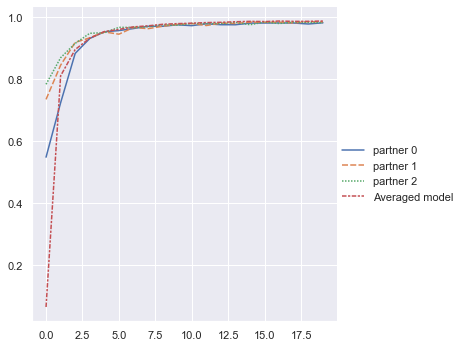

In [12]:
df = pd.DataFrame(d)


sns.relplot(data = df, kind = "line")

### Let's ommit the begining

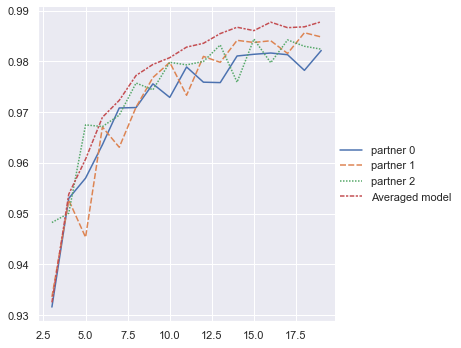

In [13]:
df = df.iloc[3:]
sns.relplot(data = df, kind = "line")

### Results 

The averaged model seems to perform poorly at the start but become better as the training continues